In [2]:
# Initial Python environment setup...
import numpy as np # linear algebra
import pandas as pd # CSV file I/O (e.g. pd.read_csv)
import os # reading the input files we have access to

In [3]:
from haversine import haversine
# packages for mapping


In [4]:
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
import plotly.plotly as py
from plotly import tools
%matplotlib inline

In [5]:
train_df =  pd.read_csv('train.csv', nrows = 10_000_00)
train_df.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [5]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
# tranform pickup date time to datetimeobject
train_df['pickup_datetime']= pd.to_datetime(train_df['pickup_datetime'])


In [7]:
 # Compute the day of week

train_df['pickup_day_of_week']=train_df['pickup_datetime'].dt.dayofweek

In [8]:
 #Compute the month
train_df['pickup_month']=train_df['pickup_datetime'].dt.month

In [9]:
train_df.tail()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month
999995,2014-09-13 21:44:38.0000001,7.0,2014-09-13 21:44:38,-73.976676,40.785630,-73.959196,40.775114,1,5,9
999996,2010-09-20 14:50:37.0000002,7.3,2010-09-20 14:50:37,-73.992103,40.671385,-73.992103,40.671385,2,0,9
999997,2013-04-26 14:03:00.000000118,10.5,2013-04-26 14:03:00,-73.978423,40.751135,-73.993397,40.762197,5,4,4
999998,2011-07-08 00:29:00.00000099,6.9,2011-07-08 00:29:00,-73.980317,40.759482,-73.976832,40.743122,1,4,7
999999,2009-12-31 14:30:00.00000021,4.1,2009-12-31 14:30:00,-74.006635,40.741598,-73.999450,40.745702,1,3,12


In [10]:
train_df['pickup_date']=train_df['pickup_datetime'].dt.date

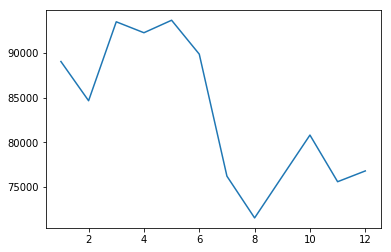

In [11]:
train_df["pickup_month"].value_counts().sort_index().plot()

In [12]:
train_df.sort_values('pickup_day_of_week', ascending = True, inplace= True)

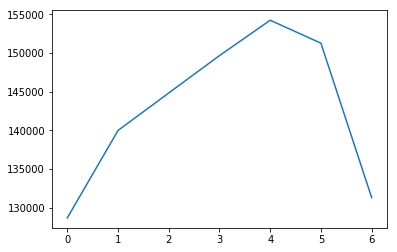

In [13]:
train_df["pickup_day_of_week"].value_counts().sort_index().plot()

In [14]:
train_df['pickup_hour']=train_df['pickup_datetime'].dt.hour

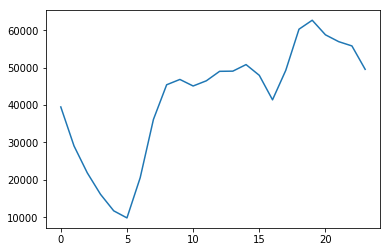

In [15]:
train_df['pickup_hour'].value_counts().sort_index().plot()

In [16]:
train_df['pickup_year']=train_df['pickup_datetime'].dt.year

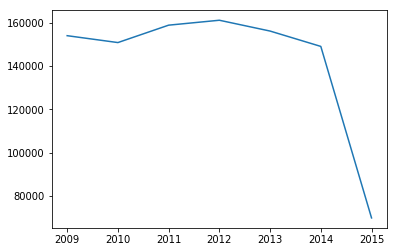

In [17]:
train_df['pickup_year'].value_counts().sort_index().plot()

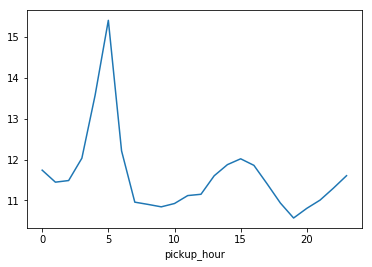

In [18]:
train_df.groupby('pickup_hour')['fare_amount'].mean().plot()

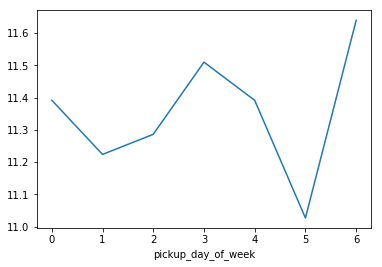

In [19]:
train_df.groupby('pickup_day_of_week')['fare_amount'].mean().plot()

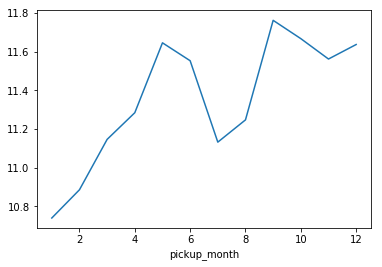

In [20]:
train_df.groupby('pickup_month')['fare_amount'].mean().plot()

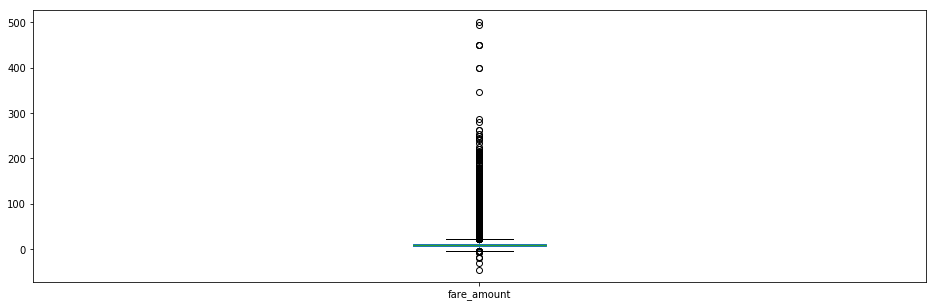

In [21]:
train_df["fare_amount"].plot.box(figsize=(16,5))  

In [27]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,0,6,2009-06-15,17,2009
410475,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-73.992147,40.762532,-73.984915,40.768142,5,0,8,2009-08-03,23,2009
410487,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-73.993900,40.750800,-74.014800,40.718000,1,0,7,2011-07-11,13,2011
410491,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-73.979827,40.766015,-73.962497,40.677382,3,0,12,2012-12-17,22,2012
410493,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-73.995742,40.726778,-73.978080,40.721325,1,0,2,2011-02-28,22,2011


In [28]:
train_df['id'] = train_df.index

In [314]:
new =train_df.groupby(pd.Grouper(key='pickup_datetime', freq='30T')).apply(lambda x: x['id'])

In [315]:
train_df['id'] = train_df.index

In [316]:
new

pickup_datetime            
2009-01-01 00:00:00  496831    880228
                     476205    661006
                     455668    756707
                     463490    745620
                     497968    964259
                     429612    915988
2009-01-01 00:30:00  534793    297860
                     551639    124750
                     475925    876677
                     543219     82469
                     553673    124445
                     481315    973236
                     492985    965480
2009-01-01 01:00:00  452273    760438
                     473058    894290
                     462003    766885
                     467958    945037
                     501683     76195
                     506057    102243
                     491811    773755
                     413667    542263
2009-01-01 01:30:00  470098     12739
                     425369    709206
                     525187    307980
                     416679    674362
2009-01-01 02:00:00  4

In [317]:
pd.Grouper(key='pickup_datetime', freq='30m')

TimeGrouper(key='pickup_datetime', freq=<30 * MonthEnds>, axis=0, sort=True, closed='right', label='right', how='mean', convention='e', base=0)

In [318]:
new.index.get_level_values('pickup_datetime')

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 00:00:00',
               '2009-01-01 00:00:00', '2009-01-01 00:00:00',
               '2009-01-01 00:00:00', '2009-01-01 00:00:00',
               '2009-01-01 00:30:00', '2009-01-01 00:30:00',
               '2009-01-01 00:30:00', '2009-01-01 00:30:00',
               ...
               '2015-06-30 23:00:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00',
               '2015-06-30 23:30:00', '2015-06-30 23:30:00'],
              dtype='datetime64[ns]', name='pickup_datetime', length=1000000, freq='30T')

In [319]:
train_df.loc[train_df["key"] == '799435' ]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval,interval_time,demand,distance


In [320]:
train_df.dtypes

key                           object
fare_amount                  float64
pickup_datetime       datetime64[ns]
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
passenger_count                int64
pickup_day_of_week             int64
pickup_month                   int64
pickup_date                   object
pickup_hour                    int64
pickup_year                    int64
id                             int64
interval              datetime64[ns]
interval_time                 object
demand                         int64
distance                     float64
dtype: object

In [321]:
interval_df=pd.DataFrame({'interval':new.index.get_level_values(0), 'id':new.index.get_level_values(1)})

In [322]:
new.index.get_level_values(1)

Int64Index([496831, 476205, 455668, 463490, 497968, 429612, 534793, 551639,
            475925, 543219,
            ...
            243818, 194077, 133754, 160836, 142686, 164262, 234133, 246934,
            133822, 172083],
           dtype='int64', length=1000000)

In [323]:
interval_df.dtypes

interval    datetime64[ns]
id                   int64
dtype: object

In [324]:
interval_df.tail()

,interval,id
999995,2015-06-30 23:30:00,164262
999996,2015-06-30 23:30:00,234133
999997,2015-06-30 23:30:00,246934
999998,2015-06-30 23:30:00,133822
999999,2015-06-30 23:30:00,172083


In [325]:
train_df.loc[train_df["id"] == 751350]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval,interval_time,demand,distance
751350,2015-02-07 10:22:55.0000002,4.5,2015-02-07 10:22:55,-74.0,40.76,-73.988281,40.767265,1,5,2,2015-02-07,10,2015,751350,2015-02-07 10:00:00,10:00:00,2,1.79477


In [337]:
train_df=pd.merge(train_df, interval_df, left_on = 'id', right_on = 'id', how = 'inner')

In [339]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval_x,interval_time,demand,distance,interval_y,interval
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.8,40.72,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:00:00,17:00:00,1,4.365758,2009-06-15 17:00:00,2009-06-15 17:00:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-74.0,40.76,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,1,2009-08-03 23:00:00,23:00:00,3,2.175726,2009-08-03 23:00:00,2009-08-03 23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-74.0,40.75,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,2,2011-07-11 13:00:00,13:00:00,3,4.805557,2011-07-11 13:00:00,2011-07-11 13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-74.0,40.77,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,3,2012-12-17 22:00:00,22:00:00,3,13.461272,2012-12-17 22:30:00,2012-12-17 22:30:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.0,40.73,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,4,2011-02-28 22:00:00,22:00:00,6,2.811899,2011-02-28 22:00:00,2011-02-28 22:00:00


In [340]:
train_df['interval_time']=train_df['interval'].dt.time

In [342]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval_x,interval_time,demand,distance,interval_y,interval
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.8,40.72,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:00:00,17:00:00,1,4.365758,2009-06-15 17:00:00,2009-06-15 17:00:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-74.0,40.76,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,1,2009-08-03 23:00:00,23:00:00,3,2.175726,2009-08-03 23:00:00,2009-08-03 23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-74.0,40.75,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,2,2011-07-11 13:00:00,13:00:00,3,4.805557,2011-07-11 13:00:00,2011-07-11 13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-74.0,40.77,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,3,2012-12-17 22:00:00,22:30:00,3,13.461272,2012-12-17 22:30:00,2012-12-17 22:30:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.0,40.73,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,4,2011-02-28 22:00:00,22:00:00,6,2.811899,2011-02-28 22:00:00,2011-02-28 22:00:00


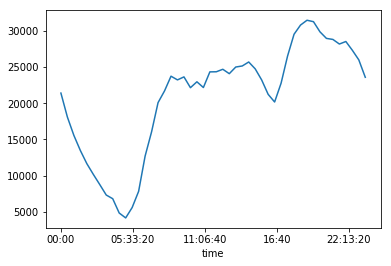

In [343]:
train_df['interval_time'].value_counts().sort_index().plot()

In [344]:
train_df["pickup_longitude"] = train_df['pickup_longitude'].apply(lambda x:round(x,1))


In [345]:
train_df["pickup_latitude"] = train_df['pickup_latitude'].apply(lambda x:round(x,2))


In [346]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval_x,interval_time,demand,distance,interval_y,interval
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.8,40.72,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:00:00,17:00:00,1,4.365758,2009-06-15 17:00:00,2009-06-15 17:00:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-74.0,40.76,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,1,2009-08-03 23:00:00,23:00:00,3,2.175726,2009-08-03 23:00:00,2009-08-03 23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-74.0,40.75,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,2,2011-07-11 13:00:00,13:00:00,3,4.805557,2011-07-11 13:00:00,2011-07-11 13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-74.0,40.77,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,3,2012-12-17 22:00:00,22:30:00,3,13.461272,2012-12-17 22:30:00,2012-12-17 22:30:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.0,40.73,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,4,2011-02-28 22:00:00,22:00:00,6,2.811899,2011-02-28 22:00:00,2011-02-28 22:00:00


In [347]:
train_df['demand']=train_df.groupby(['interval','pickup_longitude','pickup_latitude'])['interval'].transform('count')

In [348]:
train_df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day_of_week,pickup_month,pickup_date,pickup_hour,pickup_year,id,interval_x,interval_time,demand,distance,interval_y,interval
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.8,40.72,-73.841610,40.712278,1,0,6,2009-06-15,17,2009,0,2009-06-15 17:00:00,17:00:00,1,4.365758,2009-06-15 17:00:00,2009-06-15 17:00:00
1,2009-08-03 23:01:00.00000077,4.5,2009-08-03 23:01:00,-74.0,40.76,-73.984915,40.768142,5,0,8,2009-08-03,23,2009,1,2009-08-03 23:00:00,23:00:00,1,2.175726,2009-08-03 23:00:00,2009-08-03 23:00:00
2,2011-07-11 13:08:09.0000001,10.9,2011-07-11 13:08:09,-74.0,40.75,-74.014800,40.718000,1,0,7,2011-07-11,13,2011,2,2011-07-11 13:00:00,13:00:00,3,4.805557,2011-07-11 13:00:00,2011-07-11 13:00:00
3,2012-12-17 22:58:00.000000163,29.0,2012-12-17 22:58:00,-74.0,40.77,-73.962497,40.677382,3,0,12,2012-12-17,22,2012,3,2012-12-17 22:00:00,22:30:00,2,13.461272,2012-12-17 22:30:00,2012-12-17 22:30:00
4,2011-02-28 22:03:00.000000115,6.1,2011-02-28 22:03:00,-74.0,40.73,-73.978080,40.721325,1,0,2,2011-02-28,22,2011,4,2011-02-28 22:00:00,22:00:00,4,2.811899,2011-02-28 22:00:00,2011-02-28 22:00:00


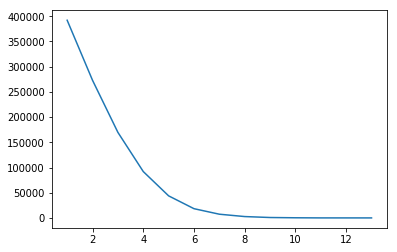

In [349]:
train_df['demand'].value_counts().sort_index().plot()

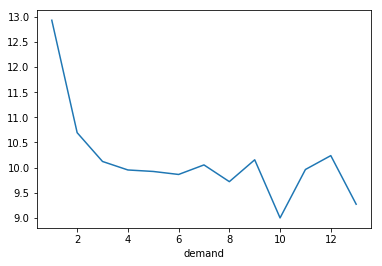

In [350]:
train_df.groupby('demand')['fare_amount'].mean().plot()

In [351]:
def distance(lat1, lon1, lat2, lon2):
    """
    calculates the Manhattan distance between 2 points using their coordinates   
    Returns
    -------
    d: float
        The Manhattan distance between the two points in kilometers
    """
    d = haversine((lat1, lon1), (lat2, lon1)) + haversine((lat2, lon1), (lat2, lon2))
    return d

# The distance is calculated in kilometers
train_df["distance"] = train_df.apply(lambda row: distance(row["pickup_latitude"], 
                                               row["pickup_longitude"], 
                                               row["dropoff_latitude"], 
                                               row["dropoff_longitude"]), axis=1)

In [352]:
train_df["distance"]

0          4.365758
1          2.175726
2          4.805557
3         13.461272
4          2.811899
5          2.236704
6          2.759051
7          3.779220
8          7.227713
9          0.758220
10         0.936794
11         6.980522
12         0.858484
13         4.409194
14         5.597084
15        20.155024
16         2.769499
17         3.462153
18         4.028002
19         2.386084
20         2.323553
21         5.556529
22         7.693177
23         3.795712
24         5.689749
25         1.425140
26         2.069988
27         4.691100
28         3.058164
29         0.000000
            ...    
999970     8.208024
999971     4.013119
999972     4.445124
999973     4.751429
999974     3.350710
999975     4.375909
999976     1.765962
999977    33.232364
999978     8.190792
999979     5.135354
999980    21.703501
999981    10.432956
999982     2.734151
999983     1.729356
999984     2.445260
999985     4.390693
999986     4.740688
999987    17.242261
999988     7.503730


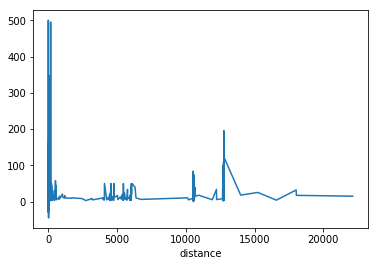

In [353]:
train_df.groupby('distance')['fare_amount'].mean().plot()

In [354]:
train_df["fare_amount"]

0          4.50
1          4.50
2         10.90
3         29.00
4          6.10
5          6.90
6          6.10
7          7.70
8          8.10
9         56.80
10         4.50
11        22.89
12         4.10
13        13.50
14         6.10
15        44.00
16         6.90
17         7.30
18         5.00
19         4.50
20         4.90
21         7.00
22        14.00
23         6.50
24        16.10
25         6.50
26         7.50
27         9.70
28        10.50
29         4.90
          ...  
999970    15.50
999971    15.00
999972    11.00
999973     7.00
999974     4.50
999975     8.90
999976     7.30
999977    57.33
999978    12.10
999979     4.90
999980    48.33
999981    15.70
999982     6.50
999983     6.50
999984     6.50
999985     5.30
999986    10.00
999987    17.30
999988    10.90
999989    10.10
999990    13.70
999991     9.50
999992    31.83
999993    19.30
999994     3.70
999995    14.90
999996    11.50
999997    24.00
999998     4.90
999999     7.50
Name: fare_amount, Lengt

In [355]:
train_df['distance'].max()

22138.03906981074

In [356]:
train_df.to_csv("train_formatted_demand.csv")

In [357]:
train_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fare_amount,1000000.0,11.348079,9.822090,-44.900000,6.000000,8.500000,12.500000,500.000000
pickup_longitude,1000000.0,-72.541486,12.059714,-3377.700000,-74.000000,-74.000000,-74.000000,2522.300000
pickup_latitude,1000000.0,39.928901,7.626147,-3116.290000,40.730000,40.750000,40.770000,2621.630000
dropoff_longitude,999990.0,-72.527860,11.324494,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999990.0,39.919954,8.201418,-3114.338567,40.734046,40.753166,40.768129,1651.553433
passenger_count,1000000.0,1.684924,1.323911,0.000000,1.000000,1.000000,2.000000,208.000000
pickup_day_of_week,1000000.0,3.039856,1.949970,0.000000,1.000000,3.000000,5.000000,6.000000
pickup_month,1000000.0,6.267875,3.436243,1.000000,3.000000,6.000000,9.000000,12.000000
pickup_hour,1000000.0,13.509477,6.513840,0.000000,9.000000,14.000000,19.000000,23.000000
pickup_year,1000000.0,2011.741106,1.860754,2009.000000,2010.000000,2012.000000,2013.000000,2015.000000


In [358]:
train_df["interval"]

0        2009-06-15 17:00:00
1        2009-08-03 23:00:00
2        2011-07-11 13:00:00
3        2012-12-17 22:30:00
4        2011-02-28 22:00:00
5        2010-03-29 13:00:00
6        2012-03-26 02:00:00
7        2011-04-18 14:00:00
8        2012-07-02 22:30:00
9        2012-10-01 00:00:00
10       2009-09-21 20:30:00
11       2012-06-18 21:30:00
12       2009-06-15 14:30:00
13       2013-05-06 07:30:00
14       2010-01-11 17:00:00
15       2013-06-17 16:00:00
16       2012-03-26 17:00:00
17       2009-05-04 15:30:00
18       2015-02-02 10:30:00
19       2015-06-15 15:30:00
20       2011-02-07 09:00:00
21       2012-09-10 22:30:00
22       2014-10-27 17:00:00
23       2009-03-16 10:00:00
24       2009-08-31 01:00:00
25       2013-02-11 09:00:00
26       2015-03-02 13:30:00
27       2012-04-02 22:00:00
28       2010-02-22 09:30:00
29       2009-12-28 20:00:00
                 ...        
999970   2014-02-09 20:30:00
999971   2014-05-11 16:00:00
999972   2014-06-01 12:00:00
999973   2013-

In [359]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 20 columns):
key                   1000000 non-null object
fare_amount           1000000 non-null float64
pickup_datetime       1000000 non-null datetime64[ns]
pickup_longitude      1000000 non-null float64
pickup_latitude       1000000 non-null float64
dropoff_longitude     999990 non-null float64
dropoff_latitude      999990 non-null float64
passenger_count       1000000 non-null int64
pickup_day_of_week    1000000 non-null int64
pickup_month          1000000 non-null int64
pickup_date           1000000 non-null object
pickup_hour           1000000 non-null int64
pickup_year           1000000 non-null int64
id                    1000000 non-null int64
interval_x            1000000 non-null datetime64[ns]
interval_time         1000000 non-null object
demand                1000000 non-null int64
distance              999990 non-null float64
interval_y            1000000 non-null datetime6

In [360]:
train_df.to_csv("formatted_demand.csv")

In [17]:
df = pd.read_csv('formatted_demand.csv')

In [18]:

df = df[["demand","fare_amount","pickup_longitude","pickup_latitude","pickup_hour","interval","pickup_day_of_week","distance"]]

{'whiskers': [<matplotlib.lines.Line2D at 0xe6ab978>,
 'caps': [<matplotlib.lines.Line2D at 0xe6abe80>,
 'boxes': [<matplotlib.lines.Line2D at 0xe6ab400>],
 'medians': [<matplotlib.lines.Line2D at 0x141e7a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x141e7e80>],
 'means': []}

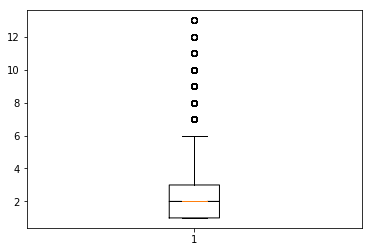

In [19]:
plt.boxplot(df["demand"],"demand")

{'whiskers': [<matplotlib.lines.Line2D at 0xc9e8b70>,
 'caps': [<matplotlib.lines.Line2D at 0xc9e2400>,
 'boxes': [<matplotlib.lines.Line2D at 0xc9e8630>],
 'medians': [<matplotlib.lines.Line2D at 0xc9e2c50>],
 'fliers': [<matplotlib.lines.Line2D at 0xc9e2d30>],
 'means': []}

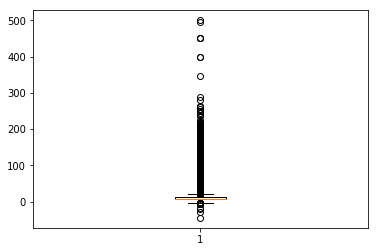

In [20]:
plt.boxplot(df["fare_amount"])

{'whiskers': [<matplotlib.lines.Line2D at 0x17238c88>,
 'caps': [<matplotlib.lines.Line2D at 0x11b21908>,
 'boxes': [<matplotlib.lines.Line2D at 0x17238b38>],
 'medians': [<matplotlib.lines.Line2D at 0x11b21e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x11b1b5c0>],
 'means': []}

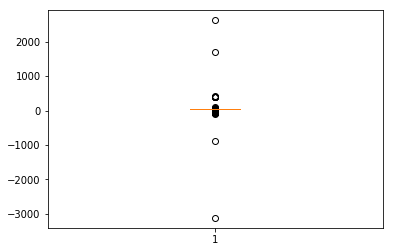

In [21]:
plt.boxplot(df["pickup_latitude"])

{'whiskers': [<matplotlib.lines.Line2D at 0xc299438>,
 'caps': [<matplotlib.lines.Line2D at 0xc299c88>,
 'boxes': [<matplotlib.lines.Line2D at 0x19a6deb8>],
 'medians': [<matplotlib.lines.Line2D at 0xc290518>],
 'fliers': [<matplotlib.lines.Line2D at 0xc290940>],
 'means': []}

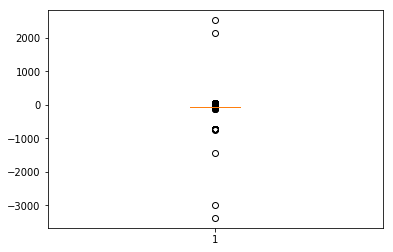

In [22]:
plt.boxplot(df["pickup_longitude"])

In [23]:
df =df.convert_objects(convert_numeric=True)

C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [24]:
df.interval = pd.to_datetime(df.interval)

In [25]:
df =df.loc[df.pickup_longitude<80]

In [26]:
df=df.loc[df.demand<7]

In [27]:
df=df.loc[df.distance<100]

In [28]:
df.describe()

,demand,fare_amount,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_week,distance
count,986371.000000,986371.000000,986371.000000,986371.000000,986371.000000,986371.000000,986371.000000
mean,2.169433,11.353815,-72.581519,39.950049,13.478062,3.044846,4.799497
std,1.267836,9.797261,10.227200,6.030199,6.517109,1.951743,4.607051
min,1.000000,-44.900000,-121.400000,-74.020000,0.000000,0.000000,0.000000
25%,1.000000,6.000000,-74.000000,40.730000,9.000000,1.000000,2.234357
50%,2.000000,8.500000,-74.000000,40.750000,14.000000,3.000000,3.615388
75%,3.000000,12.500000,-74.000000,40.770000,19.000000,5.000000,5.606091
max,6.000000,500.000000,40.900000,401.080000,23.000000,6.000000,95.920042


In [29]:
df.corr()

,demand,fare_amount,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_week,distance
demand,1.000000,-0.111942,-0.104161,0.099997,0.120123,-0.021426,-0.120206
fare_amount,-0.111942,1.000000,0.007912,-0.007562,-0.018320,0.002316,0.769885
pickup_longitude,-0.104161,0.007912,1.000000,-0.980448,0.000236,0.002260,-0.136582
pickup_latitude,0.099997,-0.007562,-0.980448,1.000000,-0.000057,-0.003416,0.129479
pickup_hour,0.120123,-0.018320,0.000236,-0.000057,1.000000,-0.085876,-0.036323
pickup_day_of_week,-0.021426,0.002316,0.002260,-0.003416,-0.085876,1.000000,0.008274
distance,-0.120206,0.769885,-0.136582,0.129479,-0.036323,0.008274,1.000000


In [30]:
df.index = df.interval

In [31]:
df = df.resample(rule='60T', closed='left', label='left', base=17).mean()

In [32]:
df = df[df.columns].apply(pd.to_numeric, errors='coerce')

In [33]:
df.head()


,demand,fare_amount,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_week,distance
interval,,,,,,,
2008-12-31 23:17:00,1.333333,11.666667,-74.000000,40.768333,0.000000,3.0,7.013662
2009-01-01 00:17:00,1.400000,9.666667,-73.993333,40.754667,0.533333,3.0,4.671233
2009-01-01 01:17:00,1.200000,8.800000,-74.000000,40.729000,1.600000,3.0,3.245405
2009-01-01 02:17:00,1.000000,12.811111,-73.988889,40.763333,2.555556,3.0,5.228641
2009-01-01 03:17:00,1.400000,8.470000,-74.000000,40.735000,3.600000,3.0,3.237605


In [34]:
df.isnull().values.any()


True

In [35]:
df.index.freq

<60 * Minutes>

In [36]:
df.fillna(df.mean(), inplace=True)

In [37]:
df.dtypes

demand                float64
fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
pickup_hour           float64
pickup_day_of_week    float64
distance              float64
dtype: object

In [38]:
train_size = int(len(df) * 0.80)
train, test = df[0:train_size], df[train_size:len(df)]

In [39]:
df.dtypes

demand                float64
fare_amount           float64
pickup_longitude      float64
pickup_latitude       float64
pickup_hour           float64
pickup_day_of_week    float64
distance              float64
dtype: object

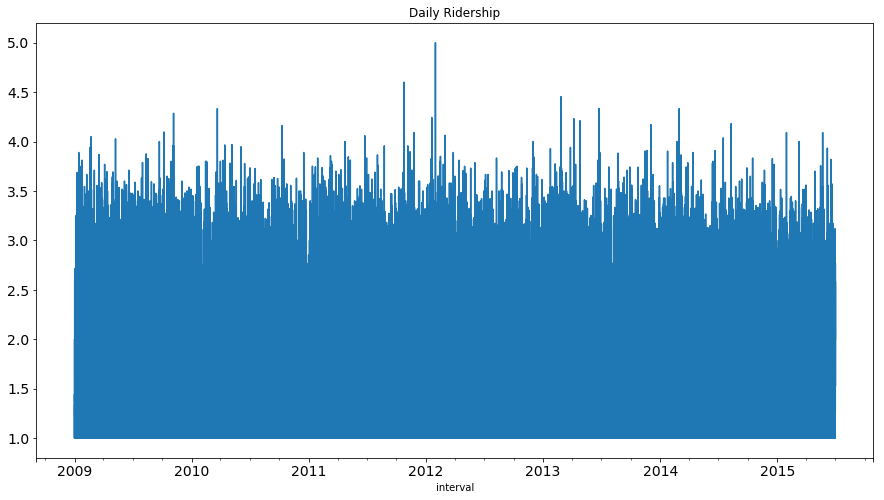

In [40]:
df.demand.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14)

In [41]:
test.tail()

,demand,fare_amount,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_week,distance
interval,,,,,,,
2015-06-30 19:17:00,2.769231,9.653846,-71.153846,39.185000,19.423077,1.0,4.316559
2015-06-30 20:17:00,1.933333,12.933333,-73.986667,40.745333,20.533333,1.0,5.641237
2015-06-30 21:17:00,1.526316,16.556842,-70.084211,38.613158,21.473684,1.0,7.141702
2015-06-30 22:17:00,2.583333,14.522500,-70.908333,39.040417,22.375000,1.0,5.077124
2015-06-30 23:17:00,2.000000,12.625000,-74.000000,40.747500,23.000000,1.0,6.001254


In [44]:
from sklearn.linear_model import LinearRegression

In [61]:
x_train = train.drop(['fare_amount'], axis=1)
x_test = test.drop(['fare_amount'], axis=1)
y_train = train[['fare_amount']]
y_test = test[['fare_amount']]

In [62]:
df.demand.describe()

count    56929.000000
mean         1.917833
std          0.615391
min          1.000000
25%          1.444444
50%          1.900000
75%          2.333333
max          5.000000
Name: demand, dtype: float64

In [64]:
y_train= y_train.apply(np.int64)

In [65]:
y_test= y_test.apply(np.int64)

In [66]:
from statsmodels.tsa.vector_ar.var_model import VAR


In [67]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [68]:
# Create linear regression object
regr = linear_model.LinearRegression()

In [69]:
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
x_test = x_test[np.isfinite(x_test['pickup_hour'])]
y_test = y_test[np.isfinite(y_test['fare_amount'])]

In [74]:
y_pred = regr.predict(x_test)


In [75]:
# The coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 0.16940942  0.20481206  0.14029056  0.02265414 -0.01138592  1.61003424]]


In [76]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 9.95
Variance score: 0.53


In [77]:
from sklearn.ensemble import RandomForestRegressor


C:\Users\user\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning:

numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.



In [78]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)  


In [79]:
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test) 

C:\Users\user\Anaconda\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [80]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 10.00
Variance score: 0.53


In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
regressor  = DecisionTreeRegressor(max_depth=5)

In [83]:
regressor.fit(x_train, y_train)  
y_pred = regressor.predict(x_test) 

In [84]:
print("Mean squared error: %.2f"
    % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 10.76
Variance score: 0.49


In [85]:
import xgboost as xgb


In [86]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [87]:
xg_reg.fit(x_train,y_train)
preds = xg_reg.predict(x_test)

In [88]:
print("Mean squared error: %.2f"
    % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 10.76
Variance score: 0.49


In [89]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

In [90]:
df.index.freq

<60 * Minutes>

In [91]:
# train autoregression
model = AR(y_train)

In [92]:
model_fit = model.fit()


In [93]:
print('Lag: %s' % model_fit.k_ar)


Lag: 55


In [94]:
print('Coefficients: %s' % model_fit.params)


Coefficients: const              1.785034
L1.fare_amount     0.072751
L2.fare_amount     0.027506
L3.fare_amount     0.005647
L4.fare_amount     0.018897
L5.fare_amount     0.007483
L6.fare_amount     0.009475
L7.fare_amount     0.007860
L8.fare_amount     0.018060
L9.fare_amount     0.006062
L10.fare_amount    0.024991
L11.fare_amount    0.020587
L12.fare_amount    0.015622
L13.fare_amount    0.018583
L14.fare_amount    0.004180
L15.fare_amount    0.011051
L16.fare_amount    0.005943
L17.fare_amount    0.007269
L18.fare_amount    0.003323
L19.fare_amount    0.001423
L20.fare_amount   -0.001883
L21.fare_amount    0.006026
L22.fare_amount    0.031128
L23.fare_amount    0.054530
L24.fare_amount    0.074428
L25.fare_amount    0.061459
L26.fare_amount    0.017415
L27.fare_amount   -0.000359
L28.fare_amount    0.000183
L29.fare_amount    0.005450
L30.fare_amount    0.000738
L31.fare_amount   -0.003000
L32.fare_amount   -0.007305
L33.fare_amount    0.001471
L34.fare_amount    0.001211
L35.fa

In [95]:
predictions = model_fit.predict(start=len(y_train), end=len(y_train)+len(y_test)-1, dynamic=False)


In [96]:
from sklearn.metrics import r2_score

In [97]:
ar_pred = np.array(predictions)

In [98]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, ar_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, ar_pred))

Mean squared error: 25.54
Variance score: -0.21


In [99]:
from matplotlib import pyplot


In [101]:
model = VAR(endog=train)


In [102]:
model_fit = model.fit()


In [103]:
prediction = model_fit.forecast(model_fit.y, steps=len(y_test))

In [104]:
cols=train.columns.values

In [109]:
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,5):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]



In [110]:
import math

In [111]:
print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred['fare_amount'], test['fare_amount'])))

rmse value for 11385 is :  5.050178588208416


In [121]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


In [122]:
# Exponential Smoothing
fit2 = SimpleExpSmoothing(np.asarray(train['fare_amount'])).fit(smoothing_level=0.6,optimized=False)

In [123]:
pred  = fit2.forecast(len(test))

In [124]:
print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred, test['fare_amount'])))

rmse value for 11385 is :  6.440018120303048


C:\Users\user\Anaconda\lib\site-packages\mkl_fft\_numpy_fft.py:1044: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



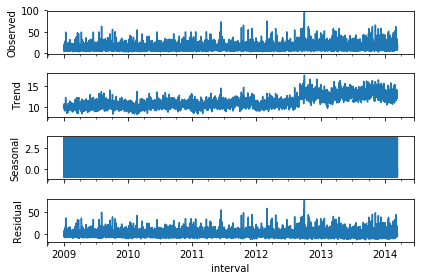

In [125]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train.fare_amount).plot()
result = sm.tsa.stattools.adfuller(train.fare_amount)
plt.show()

In [126]:
# Holt Linear Trend Method...

In [127]:
fit1 = Holt(np.asarray(train['fare_amount'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
pred= fit1.forecast(len(test))

In [128]:
print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred, test['fare_amount'])))

rmse value for 11385 is :  1468.9944670276886


In [129]:
fit1 = ExponentialSmoothing(np.asarray(train['fare_amount']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()

In [130]:
pred= fit1.forecast(len(test))

In [131]:
print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred, test['fare_amount'])))

rmse value for 11385 is :  44.706869844386645


In [134]:
fit1 = sm.tsa.statespace.SARIMAX(train.fare_amount, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()


In [135]:
test.head()

,demand,fare_amount,pickup_longitude,pickup_latitude,pickup_hour,pickup_day_of_week,distance
interval,,,,,,,
2014-03-13 14:17:00,2.100000,10.741500,-73.995000,40.752500,14.650000,3.0,3.966163
2014-03-13 15:17:00,1.250000,12.135000,-69.362500,38.209375,15.375000,3.0,3.949457
2014-03-13 16:17:00,2.619048,14.221905,-73.995238,40.758095,16.666667,3.0,6.557891
2014-03-13 17:17:00,2.652174,10.644783,-73.995652,40.747826,17.391304,3.0,4.035264
2014-03-13 18:17:00,2.314286,13.266571,-69.762857,38.425429,18.600000,3.0,3.894579


In [136]:
pred = fit1.predict(start=len(train)+1, end=len(train)+1+len(test)-1, dynamic=True)

C:\Users\user\Anaconda\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1740: ValueWarning:

Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.



In [137]:
print('rmse value for', i, 'is : ', math.sqrt(mean_squared_error(pred, test['fare_amount'])))

rmse value for 11385 is :  4.593671093129155
